In [1]:
from google.colab import files
import zipfile, os

uploaded = files.upload()

# Extract
zip_path = next(iter(uploaded))
extract_path = '/content/customer_segmentation_dataset'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files:", os.listdir(extract_path))

Saving customer_segmentation_dataset.zip to customer_segmentation_dataset.zip
Extracted files: ['customer_segmentation.csv']


**Importing the necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

**Loading the data**

In [3]:
data = pd.read_csv("customer_segmentation_dataset.zip")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


**Data Preprocessing**

*Getting some information about the dataset*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*Checking for missing values*

In [5]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


*Income has 24 missing values.*

*Filling the missing values found in Income with median*

In [6]:
data['Income'].fillna(data['Income'].median(), inplace = True)

/tmp/ipython-input-2499292756.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace = True)


*No duplicates are found in the dataset.*

In [7]:
data.duplicated().sum()

np.int64(0)

 *A quick and insightful statistical summary*

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


*Checking the number of rows and columns*

In [9]:
data.shape

(2240, 29)

*Viewing the current column names*

In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

*Removing the ID column as it is not required*

In [11]:
data.drop('ID',axis=1,inplace=True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84
MntFruits,88,1,49,4,43,42,65,10,0,0,...,3,10,1,14,3,43,0,48,30,3


*Checking the count of occurrences of the unique values*

In [12]:
data['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [13]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


**Encoding Categorical Variables**

In [14]:
le=LabelEncoder()
data['Education']=le.fit_transform(data['Education'])
data['Marital_Status']=le.fit_transform(data['Marital_Status'])

In [15]:
data['Education'].value_counts()

,count
Education,
2,1127
4,486
3,370
0,203
1,54


In [16]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
3,864
5,580
4,480
2,232
6,77
1,3
0,2
7,2


*1) Using the loop to extract the date from each datatime object and appending it to a list.                                                                   
2) Printing the newest customer enrollment date and the oldest customer enrollment date that is given in the records.*

In [17]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format="%d-%m-%Y")
dates = []

for i in data['Dt_Customer']:
  i = i.date()
  dates.append(i)

print(max(dates))
print(min(dates))

2014-06-29
2012-07-30


*Removing the Dt_Customer column as it is no more required*

In [18]:
data.drop('Dt_Customer',axis=1,inplace=True)

*Correlation matrix between features*

<Axes: >

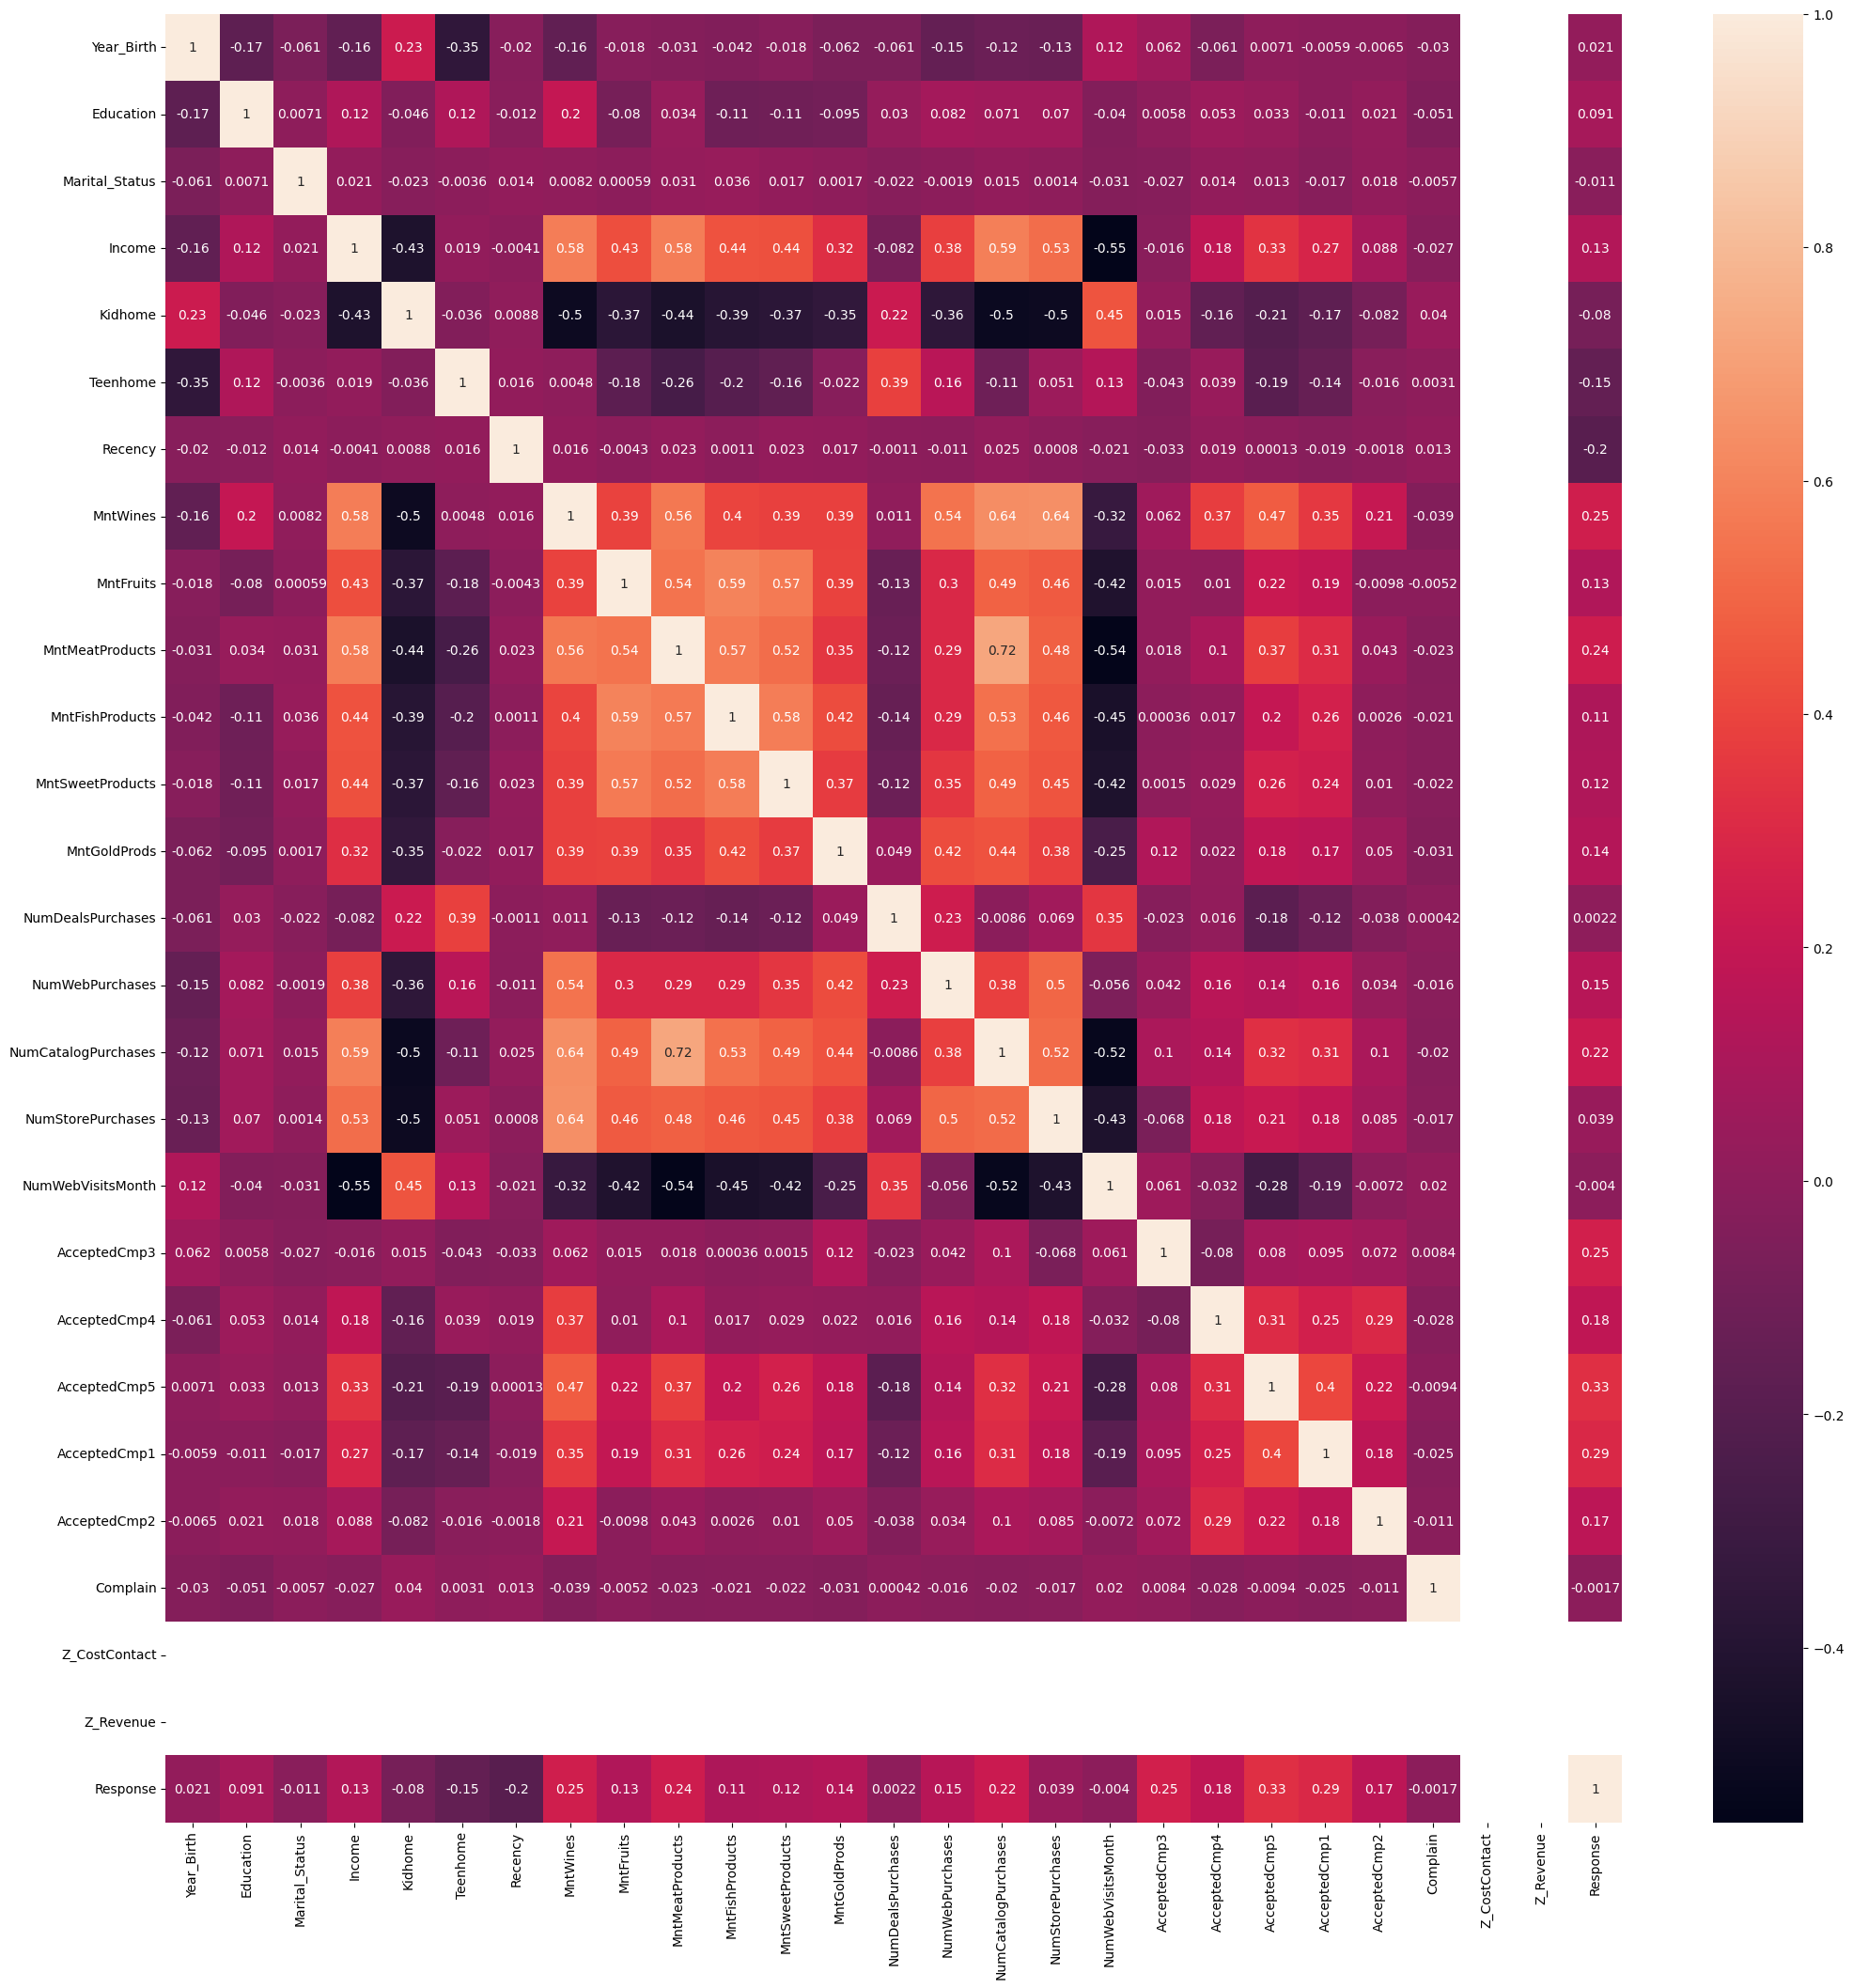

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

**Feature Engineering**

*Calculating Annual Spending as it will help understand customer behaviour, segment customers based on their spending habits, inform business decisions by targeting high spending customers*

In [20]:
data['Annual_Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Annual_Spending']

,Annual_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


*Age can help understand demographic distribution, identify age-related patterns, can be a factor in segmenting customers*
*Calculating Age of a customer by the Year_Birth.*                        
*Calculating age till 2015 as we have data till 2014*

In [21]:
data['Age'] = 2015 - data['Year_Birth']
data['Age']

,Age
0,58
1,61
2,50
3,31
4,34
...,...
2235,48
2236,69
2237,34
2238,59


*Detecting Outliers*

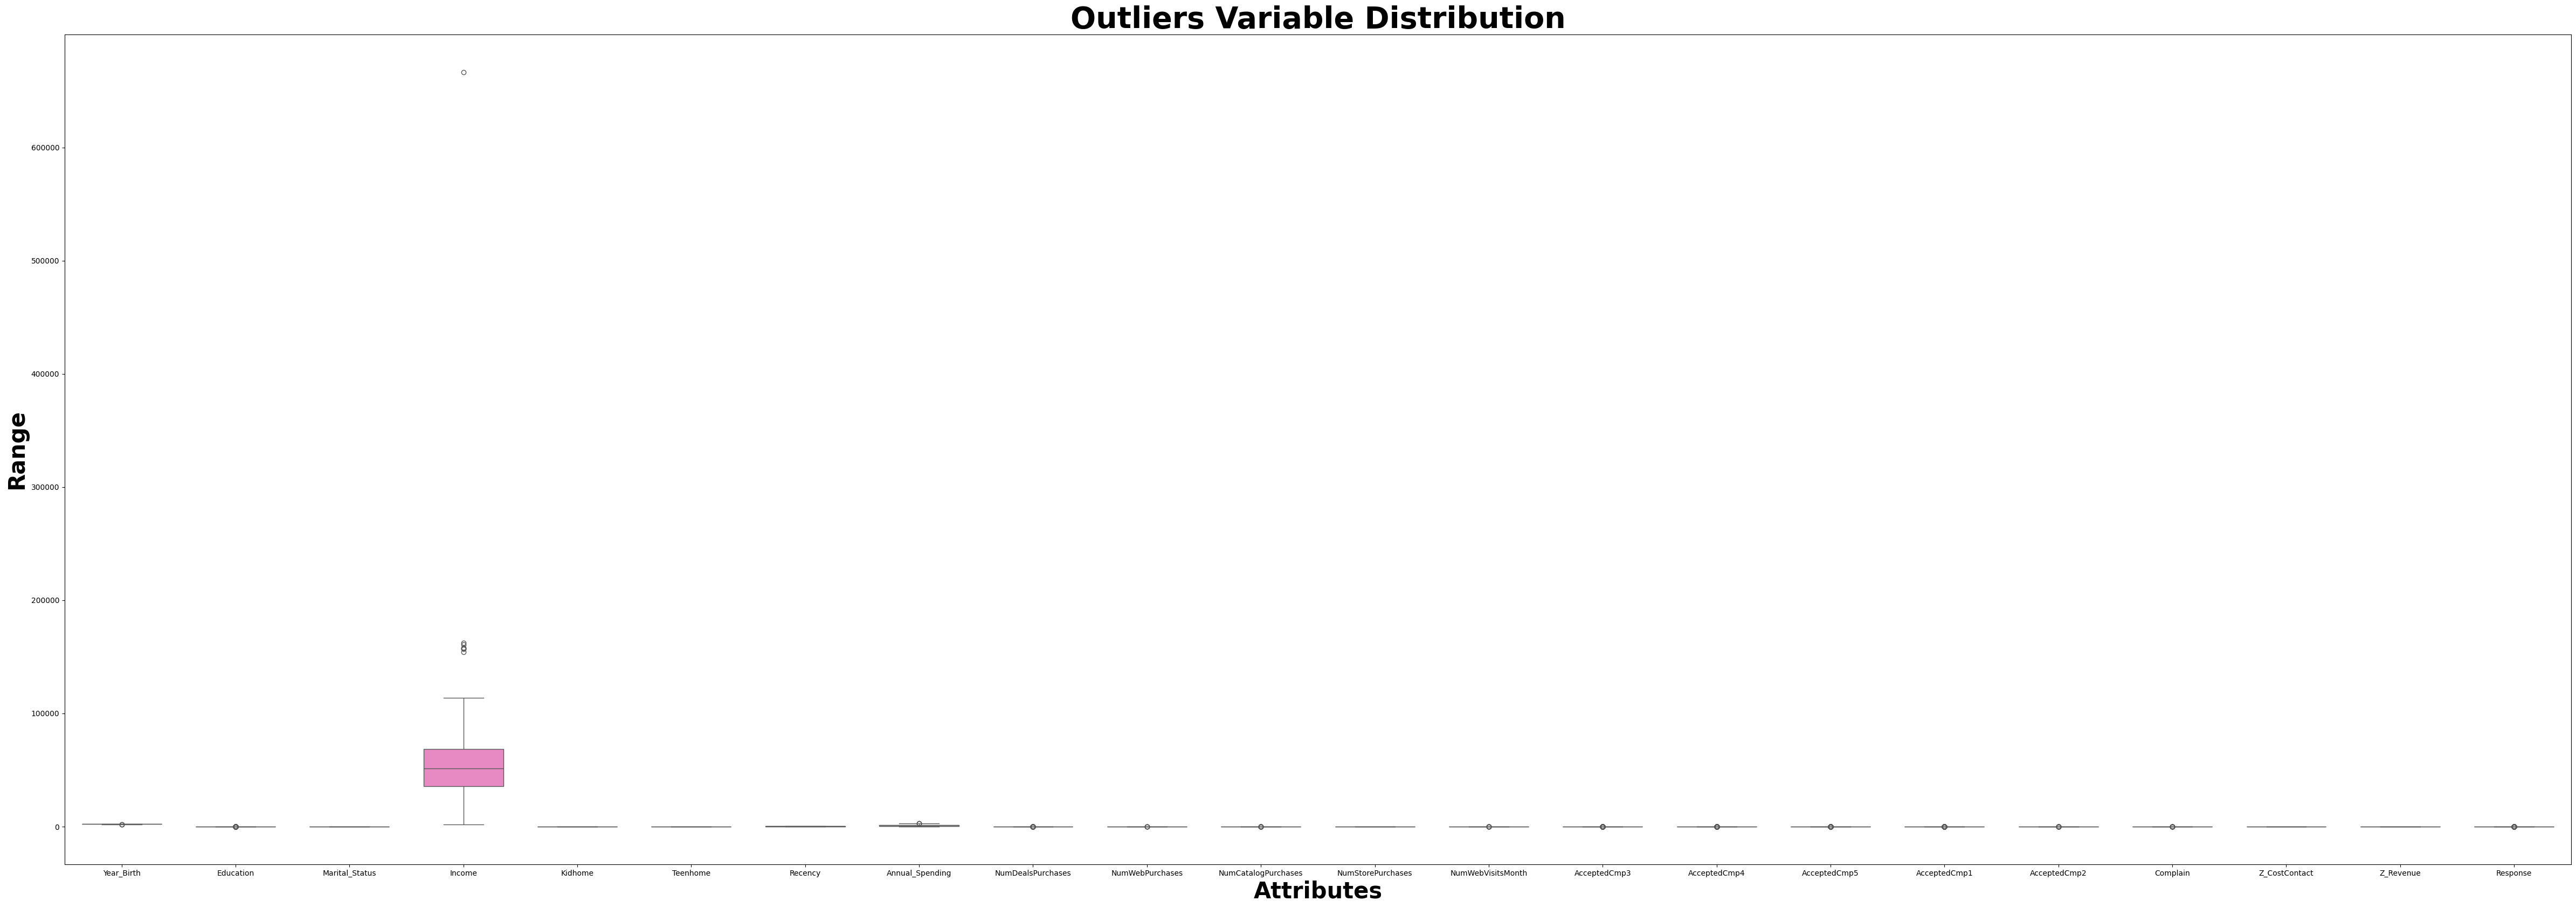

In [22]:
columns =  ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency','Annual_Spending','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
plt.rcParams['figure.figsize'] = [60,20]
sns.boxplot(data = data[columns], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 40, fontweight = 'bold')
plt.ylabel("Range", fontsize = 30, fontweight = 'bold')
plt.xlabel("Attributes", fontsize = 30, fontweight = 'bold')
plt.show()

*Removing outliers for Annual_Income*

In [23]:
Q1 = data.Income.quantile(0.05)
Q3 = data.Income.quantile(0.95)
IQR = Q3 - Q1
data_cleaned = data[(data.Income >= Q1 - 1.5*IQR) & (data.Income <= Q3 + 1.5*IQR)]
print(data.shape,data_cleaned.shape)

(2240, 29) (2239, 29)


*Selecting Relevant Columns*

In [24]:
data = data_cleaned[['Income', 'Annual_Spending', 'Age', 'Recency']]
data.head(10)

,Income,Annual_Spending,Age,Recency
0,58138.0,1617,58,58
1,46344.0,27,61,38
2,71613.0,776,50,26
3,26646.0,53,31,26
4,58293.0,422,34,94
5,62513.0,716,48,16
6,55635.0,590,44,34
7,33454.0,169,30,32
8,30351.0,46,41,19
9,5648.0,49,65,68


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2239.0,51963.554712,21410.672116,1730.0,35533.5,51381.5,68277.5,162397.0
Annual_Spending,2239.0,606.041090,602.274089,5.0,69.0,396.0,1046.0,2525.0
Age,2239.0,46.197856,11.985494,19.0,38.0,45.0,56.0,122.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0


Data Normalization

In [26]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_s = pd.DataFrame(data_scaled)
data_scaled_s.columns = ['Income', 'Annual_Spending', 'Age', 'Recency']
data_scaled_s

,Income,Annual_Spending,Age,Recency
0,0.288446,1.678944,0.984922,0.306624
1,-0.262524,-0.961639,1.235281,-0.384051
2,0.917946,0.282258,0.317300,-0.798456
3,-1.182738,-0.918460,-1.268304,-0.798456
4,0.295687,-0.305645,-1.017946,1.549838
...,...,...,...,...
2234,0.432565,1.220579,0.150394,-0.107781
2235,0.562950,-0.269109,1.902903,0.237556
2236,0.234396,1.054505,-1.017946,1.446237
2237,0.807322,0.393528,1.068375,-1.420063


*Using distance based algorithm: K-means*                                      
*wcss calculates the sum of squared distances between each point and its assigned cluster center*

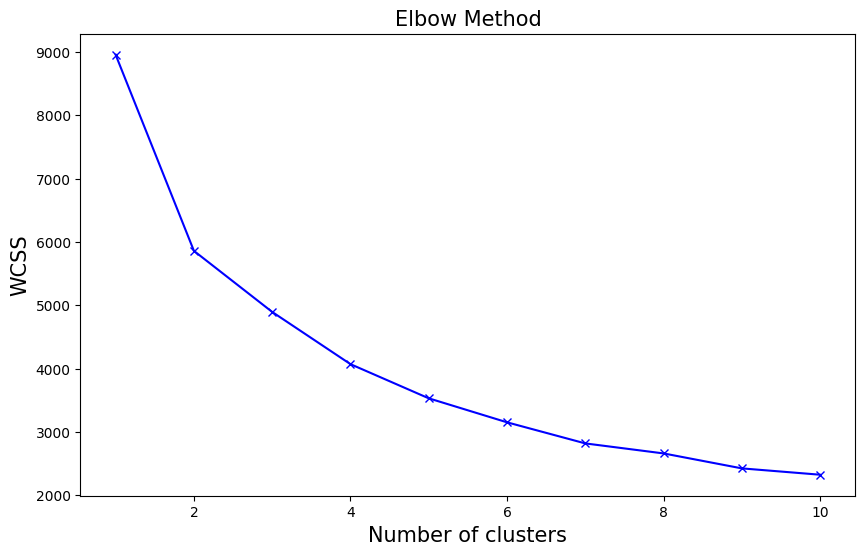

In [27]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_scaled_s)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,'bx-')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('WCSS',fontsize=15)
plt.show()

**Silhouette Score Calculation**

*Calculating the silhouette_score, which measures the separation between clusters.*

In [28]:
from sklearn.metrics import silhouette_score
cluster_labels = kmeans.fit_predict(data_scaled_s)
silhouette_score(data_scaled_s,cluster_labels)

np.float64(0.25490743656315556)

In [29]:
silhouette = float(silhouette_score(data_scaled_s,cluster_labels))
silhouette

0.25490743656315556

*Based on the Silhouette Score, no of clusters = 2 is the best value as it gives the highest Silhouette Score*

In [30]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled_s)

silhouette = float(silhouette_score(data_scaled_s,cluster_labels))
silhouette

0.31904208034694526

**Data Visualization**

*Creating a matrix of scatter plots to visualize relationships and to explore data*

array([[<Axes: xlabel='Annual_Spending', ylabel='Annual_Spending'>,
        <Axes: xlabel='Income', ylabel='Annual_Spending'>,
        <Axes: xlabel='Age', ylabel='Annual_Spending'>,
        <Axes: xlabel='Recency', ylabel='Annual_Spending'>],
       [<Axes: xlabel='Annual_Spending', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <Axes: xlabel='Age', ylabel='Income'>,
        <Axes: xlabel='Recency', ylabel='Income'>],
       [<Axes: xlabel='Annual_Spending', ylabel='Age'>,
        <Axes: xlabel='Income', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Recency', ylabel='Age'>],
       [<Axes: xlabel='Annual_Spending', ylabel='Recency'>,
        <Axes: xlabel='Income', ylabel='Recency'>,
        <Axes: xlabel='Age', ylabel='Recency'>,
        <Axes: xlabel='Recency', ylabel='Recency'>]], dtype=object)

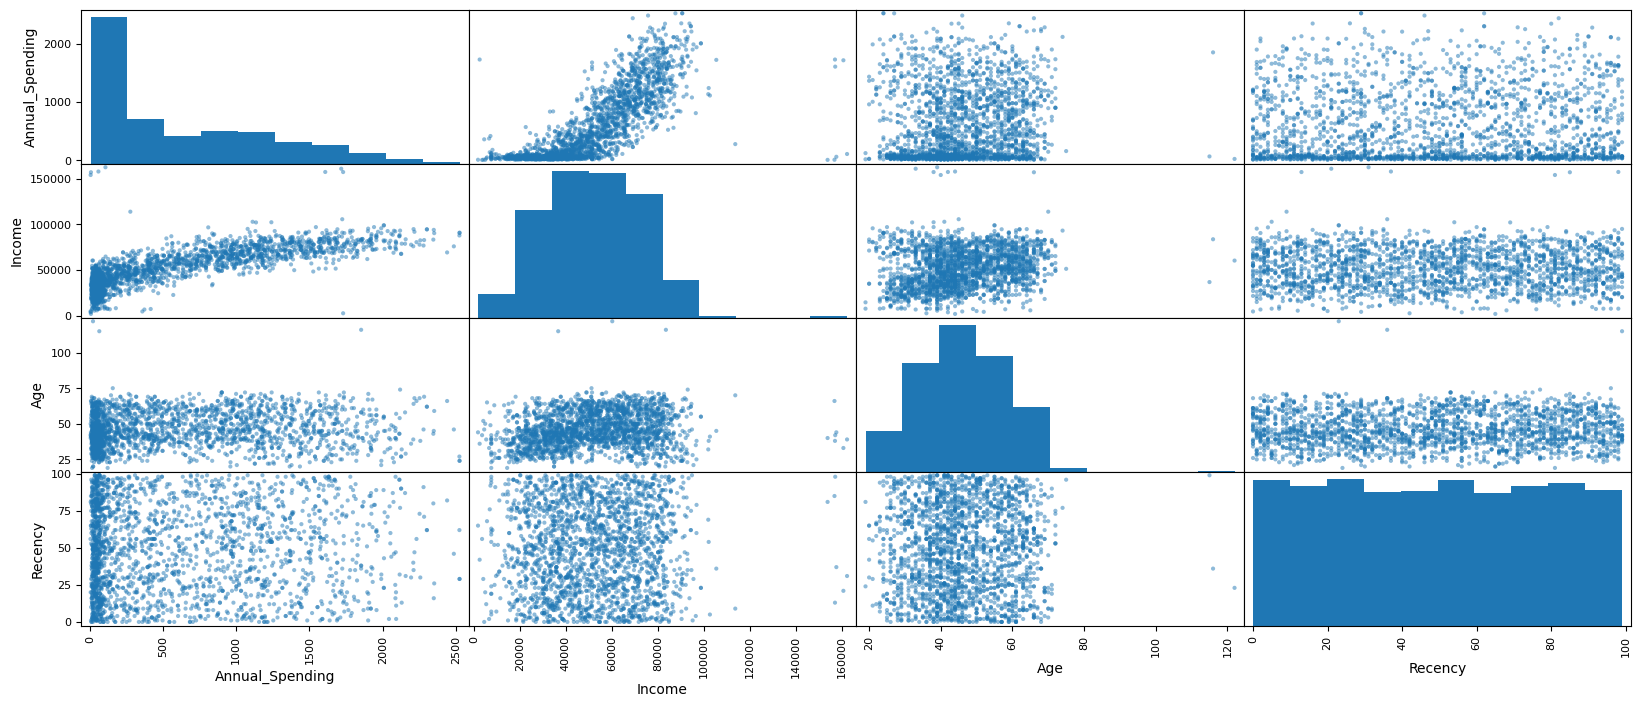

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["Annual_Spending", "Income", "Age",
              "Recency"]
scatter_matrix(data[attributes], figsize=(20, 8))

*Visualizing clusters with K-Means Labels*

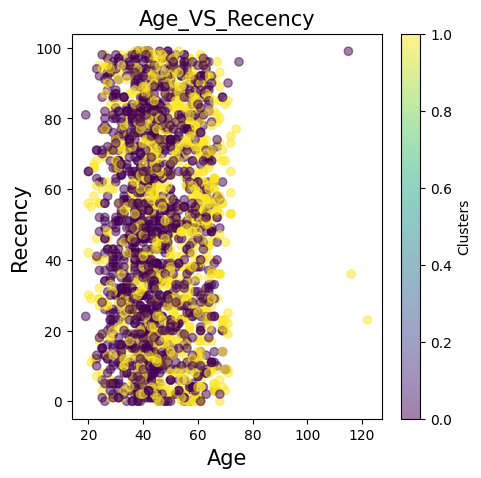

0.019601270289548132


In [32]:
plt.figure(figsize=(5,5))
plt.title("Age_VS_Recency",fontsize=15)
scatter = plt.scatter(data["Age"], data["Recency"], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Recency',fontsize=15)
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters')
plt.show()
Correlation = data['Age'].corr(data['Recency'])
print(Correlation)

Age and Recency are weakly correlated.      

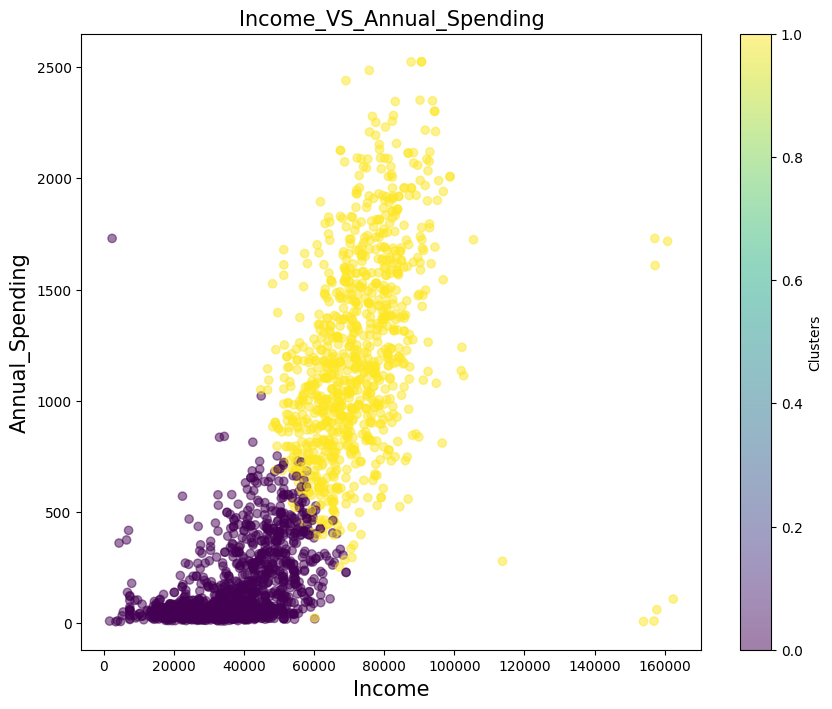

0.7892957853161519


In [33]:
plt.figure(figsize=(10,8))
plt.title("Income_VS_Annual_Spending",fontsize=15)
scatter = plt.scatter(data["Income"], data["Annual_Spending"], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Annual_Spending',fontsize=15)
cbar = plt.colorbar(scatter)
cbar.set_label('Clusters')
plt.show()
Correlation = data['Income'].corr(data['Annual_Spending'])
print(Correlation)

*Income and Annual_Spending are strongly correlated                              
Cluster 0 corresponds to violet color: Low Income and Average to Low Spending.  
Cluster 1: corresponds to yellow color: High income and High Spending.*